## **ImageToTextGenerator**(Image captioning)

**Importing Libraries**

**transformers.VisionEncoderDecoderModel**
 This module is part of the Hugging Face Transformers library and represents a vision encoder-decoder model. Vision encoder-decoder models are capable of performing tasks that involve both vision and language understanding, such as image captioning.
 
**ViTImageProcessor:** This module is also from the Hugging Face Transformers library and is specifically related to Vision Transformers (ViT). It provides functionality for processing images, which is useful when working with ViT models for vision tasks.

**AutoTokenizer:** This class is used to automatically select the appropriate tokenizer based on the model name or path provided. It's part of the Hugging Face Transformers library and is commonly used for tokenization tasks in natural language processing.

In [1]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpim

**Loading Pre-trained Model**

In [2]:
#This model combines a Vision Transformer (ViT) with a GPT-2 language model for image captioning tasks.
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
 
#Setting Device for Model Inference    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

**Defining Inference Parameters**

In [3]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

**Defining Prediction Function**

In [23]:
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")  # Convert image to RGB mode if not already

        images.append(i_image)

    # feature_extractor converts the images to pixel values and returns them as PyTorch tensors.
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values

    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds


**Performing Inference**

In [24]:
predict_step([r"C:\Users\katku\Downloads\dog.jpeg"])

['a dog catching a frisbee in a field']

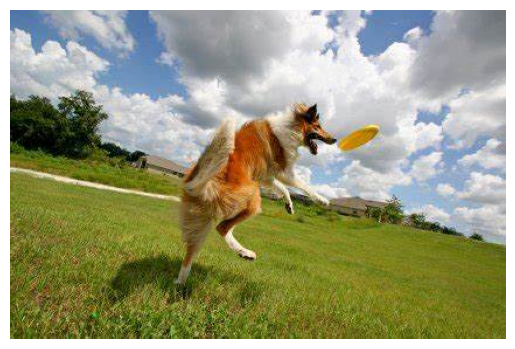

In [26]:
#Displaying the image for verification 
image_path = r"C:\Users\katku\Downloads\dog.jpeg"

# Load the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


In [27]:
predict_step([r"C:\Users\katku\Downloads\aws seg.jpg"])

['a collection of stuffed animals sitting next to each other']

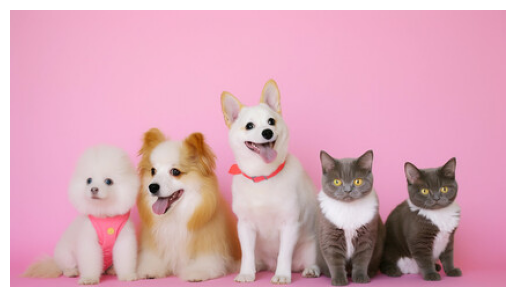

In [29]:
#Displaying the image for verification
image_path = r"C:\Users\katku\Downloads\aws seg.jpg"

# Load the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
